In [ ]:
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Montar Google Drive
drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/TF_PI/dataset'

# Creación de un ImageDataGenerator para cargar y procesar las imágenes
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalización de los píxeles a valores entre 0 y 1
    validation_split=0.2  # 80% de datos para el entrenamiento y el 20% para validación
)



Mounted at /content/drive


In [ ]:
# Preparar generador para el conjunto de entrenamiento
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),  # Tamaño al que se redimensionarán las imágenes
    batch_size=32,
    class_mode='categorical',  # Para clasificación multiclase
    subset='training'
)

# Preparar generador para el conjunto de validación
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

print("Clases asignadas:", train_generator.class_indices)

# Definir el número de clases
num_classes = 9

# Definición de la arquitectura AlexNet
modelo_alexnet = Sequential([
    Conv2D(96, kernel_size=(11, 11), strides=4, activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(3, 3), strides=2),

    Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=2),

    Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=2),

    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compilación del modelo
modelo_alexnet.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Resumen del modelo
modelo_alexnet.summary()

# Entrenamiento del modelo
modelo_alexnet.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10  # Puedes ajustar la cantidad de épocas según tus necesidades
)


Found 3803 images belonging to 9 classes.
Found 949 images belonging to 9 classes.
Clases asignadas: {'Cardboard': 0, 'Food Organics': 1, 'Glass': 2, 'Metal': 3, 'Miscellaneous Trash': 4, 'Paper': 5, 'Plastic': 6, 'Textile Trash': 7, 'Vegetation': 8}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 6, 6, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 6, 6, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │       4,198,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │          36,873 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,763,785 (94.47 MB)

 Trainable params: 24,763,785 (94.47 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


119/119 ━━━━━━━━━━━━━━━━━━━━ 985s 8s/step - accuracy: 0.1700 - loss: 2.2424 - val_accuracy: 0.1939 - val_loss: 2.1480
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.1775 - loss: 2.1563 - val_accuracy: 0.1939 - val_loss: 2.1480
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.1892 - loss: 2.1512 - val_accuracy: 0.1939 - val_loss: 2.1428
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.1848 - loss: 2.1511 - val_accuracy: 0.1939 - val_loss: 2.1425
Epoch 5/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.1914 - loss: 2.1474 - val_accuracy: 0.1939 - val_loss: 2.1419
Epoch 6/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.1904 - loss: 2.1493 - val_accuracy: 0.1939 - val_loss: 2.1425
Epoch 7/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.1852 - loss: 2.1453 - val_accuracy: 0.1939 - val_loss: 2.1425
Epoch 8/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.1953 - loss: 2.1507 - val_accuracy: 0.193

In [ ]:
# Evaluar el modelo en el conjunto de validación
loss, accuracy = modelo_alexnet.evaluate(validation_generator)
print(f"Pérdida en validación: {loss:.4f}")
print(f"Precisión en validación: {accuracy:.4f}")


30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 858ms/step - accuracy: 0.2051 - loss: 2.1212
Pérdida en validación: 2.1413
Precisión en validación: 0.1939


30/30 ━━━━━━━━━━━━━━━━━━━━ 29s 944ms/step


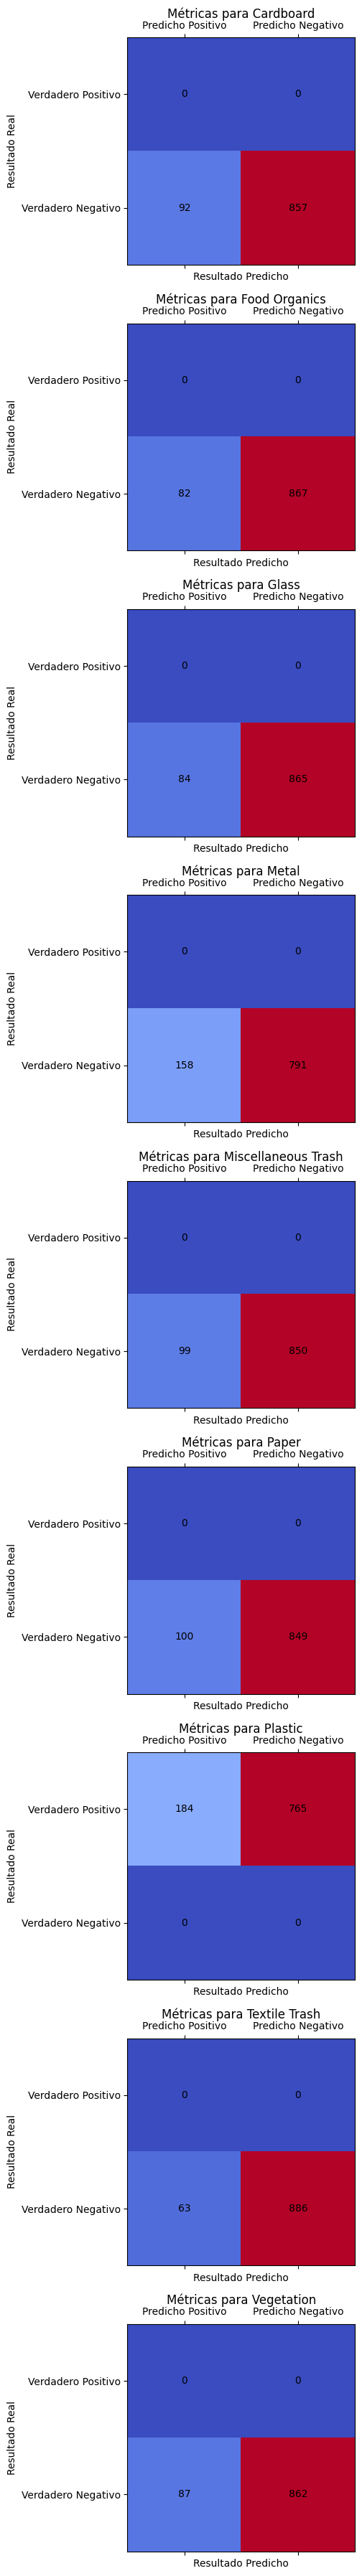

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obtener etiquetas verdaderas y predichas
validation_generator.reset()
true_labels = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())
predictions = modelo_alexnet.predict(validation_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(true_labels, predicted_labels)

# Función para calcular FP, FN, TP, TN por categoría
def calculate_metrics_for_class(cm, class_idx):
    TP = cm[class_idx, class_idx]
    FP = cm[:, class_idx].sum() - TP
    FN = cm[class_idx, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    return TP, FP, FN, TN

# Crear gráficos 2x2 para cada categoría
fig, axes = plt.subplots(len(class_labels), 1, figsize=(6, len(class_labels) * 4))
for i, class_name in enumerate(class_labels):
    TP, FP, FN, TN = calculate_metrics_for_class(cm, i)

    # Datos para el gráfico
    metrics = np.array([[TP, FP],
                        [FN, TN]])

    ax = axes[i] if len(class_labels) > 1 else axes  # Soporte para una sola clase
    im = ax.matshow(metrics, cmap='coolwarm')
    ax.set_title(f'Métricas para {class_name}', pad=20)

    for (x, y), value in np.ndenumerate(metrics):
        ax.text(y, x, f"{value}", ha='center', va='center', color='black')

    # Configuración del gráfico
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Predicho Positivo', 'Predicho Negativo'])
    ax.set_yticklabels(['Verdadero Positivo', 'Verdadero Negativo'])
    ax.set_xlabel('Resultado Predicho')
    ax.set_ylabel('Resultado Real')

# Ajustar diseño
plt.tight_layout()
plt.show()
